In [79]:


import pandas as pd

%reload_ext rpy2.ipython

In [80]:
%%R

library(readr)
adult_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)


colnames(adult_training) <- c('age','workclass','education','marital_status','occupation','sex','capital_gain','capital_loss','income')
summary(adult_training)

      age         workclass           education     marital_status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital_gain    capital_loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

In [81]:
%%R


r_crosstab <- table(adult_training$workclass, adult_training$sex)

ftable(r_crosstab)

                  Female Male
                             
?                    377  452
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3574 6707
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4


Contingency table of workclass and sex.

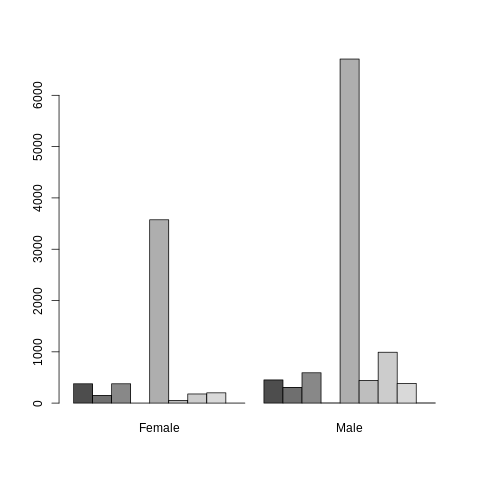

In [18]:
%%R

barplot(r_crosstab, rows = colors, beside = TRUE)

Plot of contingency table.

In [20]:
%%R


r_crosstab2 <- table(adult_training$marital_status, adult_training$sex)

ftable(r_crosstab2)

                       Female Male
                                  
Divorced                 1219  795
Married-AF-spouse           7    4
Married-civ-spouse        761 6010
Married-spouse-absent      95  104
Never-married            2160 2717
Separated                 290  182
Widowed                   380   73


Contingency table of marital status and sex.

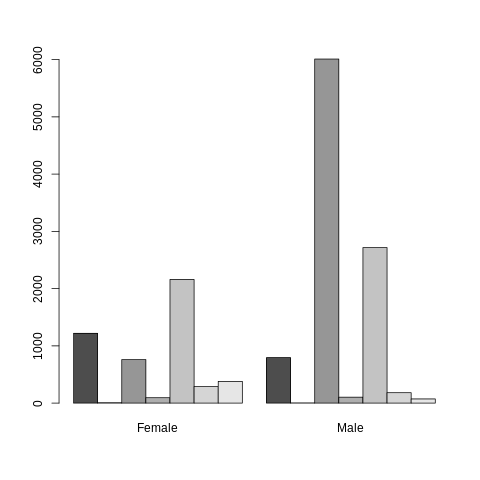

In [21]:
%%R

barplot(r_crosstab2, rows = colors, beside = TRUE)

Plot of contingency table.

In [82]:
%%R

adult_training$under40 <- adult_training$age>40

Creating a new data frame that is a true false table. If age is over 40, true, else false.

In [83]:
%%R


r_crosstab <- table(adult_training$under40, adult_training$sex)

ftable(r_crosstab)

       Female Male
                  
FALSE    3106 5547
TRUE     1806 4338


Contigency table of adults over 40 and sex. 

In [74]:
%%R

adult_training$scaled_ed <- scale(x = adult_training$education)

summary(adult_training$scaled_ed)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  


In [75]:
%%R

three_sigma_rule <- (adult_training$scaled_ed < -3 | 
                     adult_training$scaled_ed > 3 )

cat ("There are", sum(three_sigma_rule), "outliers \n\n")



cat("The scaled scaled_ed values that are outliers: \n\n")
adult_training$scaled_ed[which(three_sigma_rule)]

There are 113 outliers 

The scaled scaled_ed values that are outliers: 

  [1] -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
  [8] -3.105418 -3.105418 -3.105418 -3.490285 -3.490285 -3.105418 -3.490285
 [15] -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [22] -3.105418 -3.490285 -3.490285 -3.105418 -3.105418 -3.490285 -3.490285
 [29] -3.490285 -3.105418 -3.105418 -3.490285 -3.105418 -3.105418 -3.105418
 [36] -3.490285 -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418
 [43] -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [50] -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [57] -3.105418 -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418
 [64] -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [71] -3.490285 -3.105418 -3.490285 -3.490285 -3.490285 -3.105418 -3.490285
 [78] -3.105418 -3.490285 -3.490285 -3.490285 -3.105418 -3.490285 -3.105418
 [85] -3.10541

In [24]:
%%R

adult_training$scaled_age <- scale(x = adult_training$age)

summary(adult_training$scaled_age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  


In [27]:
%%R

three_sigma_rule <- (adult_training$scaled_age < -3 | 
                     adult_training$scaled_age > 3 )


cat ("There are", sum(three_sigma_rule), "outliers \n\n")




cat("The scaled scaled_age values that are outliers: \n\n")
adult_training$scaled_age[which(three_sigma_rule)]

There are 60 outliers 

The scaled scaled_age values that are outliers: 

 [1] 3.751227 3.020173 3.751227 3.605016 3.751227 3.751227 3.166384 3.751227
 [9] 3.020173 3.751227 3.751227 3.239489 3.385700 3.166384 3.020173 3.751227
[17] 3.020173 3.751227 3.312594 3.751227 3.751227 3.312594 3.020173 3.751227
[25] 3.312594 3.751227 3.093278 3.020173 3.020173 3.751227 3.020173 3.751227
[33] 3.239489 3.166384 3.751227 3.751227 3.166384 3.385700 3.093278 3.093278
[41] 3.751227 3.166384 3.605016 3.312594 3.458805 3.751227 3.166384 3.093278
[49] 3.751227 3.020173 3.312594 3.751227 3.093278 3.751227 3.531911 3.020173
[57] 3.166384 3.751227 3.385700 3.166384


The most extreme outlier is age 90 or standerdized number 3.751227

In [85]:
%%R

adult_training$Age_binned <- cut(x = adult_training$age, breaks = c(79,120),
       right = TRUE, 
       labels = c("Over_80"))


table(adult_training$Age_binned)


Over_80 
     60 


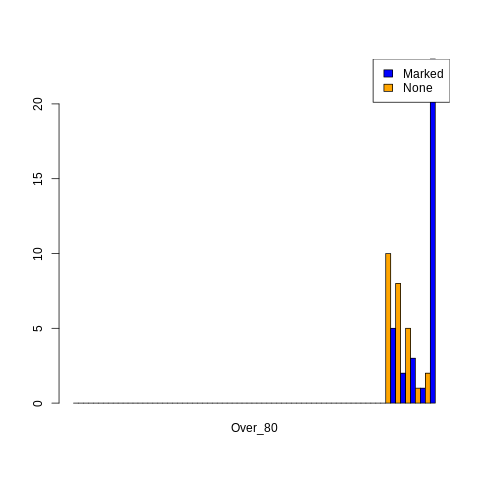

In [86]:
%%R 

r_crosstab3 <- table(adult_training$age, adult_training$Age_binned )

colors <- c("blue", "orange")

barplot(r_crosstab3, col = colors, beside = TRUE)
legend("topright", legend = c("Marked", "None"), 
       fill = colors)

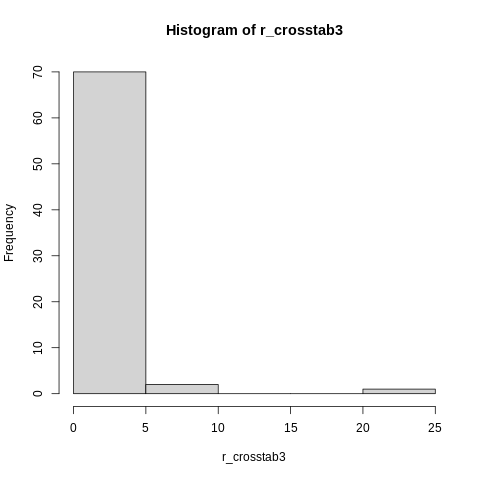

In [87]:
%%R

hist(r_crosstab3)

This graph I cross tabulated with age so I was able to graph the histogram.

The graph amost seems to be right tailed/ partially bimodal. It shows that about 4/5ths of the data falls between the first half of the histogram while there is a 1/5 percentasge at the end. 

In [96]:
%%R

library(readr)
nutrition_subset <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

colnames(nutrition_subset) <- c('food_item','weight_in_grams','saturated_fat','cholesterol')
summary(nutrition_subset)

  food_item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  


In [97]:
%%R
head(nutrition_subset[order(nutrition_subset$saturated_fat, decreasing=TRUE), 1:4])

# A tibble: 6 × 4
  food_item                            weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE            1110         120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 G…            1188         118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE            1108          92           609
4 CREME PIE                     1 PIE              910          90.1          46
5 LARD                          1 CUP              205          80.4         195
6 ICE CREAM; VANLLA; REGULR 11% 1/2 G…            1064          71.3         476


In [98]:
%%R

nutrition_subset$sfpg <- nutrition_subset$saturated_fat/nutrition_subset$weight_in_grams

(nutrition_subset[order(nutrition_subset$sfpg, decreasing=TRUE), 1:4])

# A tibble: 961 × 4
   food_item                           weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 BUTTER; SALTED                1 TB…            14             7.1          31
 2 BUTTER; UNSALTED              1 TB…            14             7.1          31
 3 BUTTER; SALTED                1/2 …           113            57.1         247
 4 BUTTER; UNSALTED              1/2 …           113            57.1         247
 5 BUTTER; SALTED                1 PAT             5             2.5          11
 6 BUTTER; UNSALTED              1 PAT             5             2.5          11
 7 LARD                          1 TB…            13             5.1          12
 8 LARD                          1 CUP           205            80.4         195
 9 IMITATION CREAMERS; POWDERED  1 TSP             2             0.7           0
10 CHOCOLATE; BITTER OT BAKING   1 OZ             28.4           9             0
# … with

I got the same results as I did in python. BUTTER; SALTED                1 TB

In [142]:
%%R

nutrition_subset$scaled_sfpg <- scale(x = nutrition_subset$sfpg)

summary(nutrition_subset$scaled_sfpg)

three_sigma_rule <- (nutrition_subset$scaled_sfpg < -3 | 
                     nutrition_subset$scaled_sfpg > 3 )



cat ("There are", sum(three_sigma_rule), "outliers \n\n")


cat("The scaled_sfpg values that are outliers: \n\n")
nutrition_subset$scaled_sfpg[which(three_sigma_rule)]


There are 15 outliers 

The scaled_sfpg values that are outliers: 

 [1] 4.238469 3.936637 4.202078 3.940837 7.079055 7.079055 5.368580 3.276520
 [9] 5.370282 3.222049 7.106775 7.106775 6.998763 6.998763 4.730522


In [141]:
%%R

nutrition_subset[order(nutrition_subset$sfpg, decreasing=TRUE), 1:4]

# A tibble: 961 × 4
   food_item                           weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 BUTTER; SALTED                1 TB…            14             7.1          31
 2 BUTTER; UNSALTED              1 TB…            14             7.1          31
 3 BUTTER; SALTED                1/2 …           113            57.1         247
 4 BUTTER; UNSALTED              1/2 …           113            57.1         247
 5 BUTTER; SALTED                1 PAT             5             2.5          11
 6 BUTTER; UNSALTED              1 PAT             5             2.5          11
 7 LARD                          1 TB…            13             5.1          12
 8 LARD                          1 CUP           205            80.4         195
 9 IMITATION CREAMERS; POWDERED  1 TSP             2             0.7           0
10 CHOCOLATE; BITTER OT BAKING   1 OZ             28.4           9             0
# … with

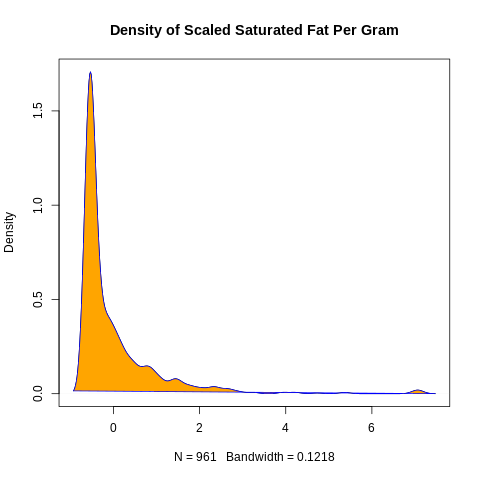

In [100]:
%%R


d2 <- density(nutrition_subset$scaled_sfpg) 


plot(d2, main="Density of Scaled Saturated Fat Per Gram") 

polygon(d2, col="orange", border="blue") 

In [101]:
%%R


cat("No. missing values = ", sum(is.na(nutrition_subset$saturated_fat)), "\n\n")


cat("Before imputation: ", head(nutrition_subset$saturated_fat, 10), "...\n")


No. missing values =  0 

Before imputation:  0 0.8 0 5.4 19.1 1 0 2.9 0.3 0.3 ...


In [102]:
%%R

cat("No. missing values = ", sum(is.na(nutrition_subset$weight_in_grams)), "\n\n")

cat("Before imputation: ", head(nutrition_subset$weight_in_grams, 10), "...\n")

No. missing values =  0 

Before imputation:  7 28.35 7 28.35 100 5 8 48 85 68 ...


In [103]:
%%R

cat("No. missing values = ", sum(is.na(nutrition_subset$cholesterol)), "\n\n")

cat("Before imputation: ", head(nutrition_subset$cholesterol, 10), "...\n")

No. missing values =  0 

Before imputation:  0 0 0 22 79 4 0 59 48 12 ...


In [104]:
%%R

nutrition_subset$sf <- scale(x = nutrition_subset$saturated_fat)

summary(nutrition_subset$sf)

three_sigma_rule <- (nutrition_subset$sf < -3 | 
                     nutrition_subset$sf > 3 )



cat ("There are", sum(three_sigma_rule), "outliers \n\n")


cat("The scaled sf values that are outliers: \n\n")
nutrition_subset$sf[which(three_sigma_rule)]

There are 20 outliers 

The scaled sf values that are outliers: 

 [1]  4.059096 10.788208  4.468613  4.803673  5.771622  4.077710  3.184218
 [8]  8.191497  6.264904  3.500663 10.639293  8.014660  4.729215  3.928795
[15]  4.943281  4.943281  7.111860  3.025996  3.277290  4.403463


In [105]:
%%R

nutrition_subset$c <- scale(x = nutrition_subset$cholesterol)

summary(nutrition_subset$c)

three_sigma_rule <- (nutrition_subset$c < -3 | 
                     nutrition_subset$c > 3 )


cat ("There are", sum(three_sigma_rule), "outliers \n\n")



cat("The scaled c values that are outliers: \n\n")
nutrition_subset$c[which(three_sigma_rule)]

There are 17 outliers 

The scaled c values that are outliers: 

 [1]  3.146420  4.355150  8.148063  5.063716 16.842585  8.898309  4.471855
 [8]  4.330142  4.713601  9.590203  4.530208  5.188757  6.872644  4.805298
[15]  3.696601  5.030372  5.588889


In [106]:
%%R

nutrition_subset$wig <- scale(x = nutrition_subset$weight_in_grams)

summary(nutrition_subset$wig)

three_sigma_rule <- (nutrition_subset$wig < -3 | 
                     nutrition_subset$wig > 3 )


cat ("There are", sum(three_sigma_rule), "outliers \n\n")




cat("The scaled wig values that are outliers: \n\n")
nutrition_subset$wig[which(three_sigma_rule)]

There are 22 outliers 

The scaled wig values that are outliers: 

 [1] 4.323765 6.887585 5.460714 3.840561 3.567693 5.443659 7.882415 5.449344
 [9] 4.323765 5.108259 5.631256 3.925832 5.449344 5.199215 5.381127 5.904124
[17] 4.522731 4.522731 4.522731 4.522731 4.323765 7.916524




To summarize:

In the comparrison of workclass and sex, males lead in all different work classes. The biggest class is the "Private" class. The graph also shows more clearly this point in both python and R. 

In the next contingency table, most were married-civ-spouse with never married as a close second. It was interesting how many more married men than women there were. Once again, it was evident in the bar plots.

In the final table it was unclear what to have the two variable be butr since the first two tables had sex as a variable, i used it once again. There were more men that were both over and under 40 but under had less of a range gap.
Looking at R there were 113 outliers. Looking at the histogram in python, the outliers seemed to come from the 0-8ish sections. 

Going into the scaled age set there were 60 outliers.There was a steep dropoff towards the positive side of the plot. It seemed that the lower numbers weighed a lot on the graphs scaled plot. Looking at the scaled age outlier destiny plot, it is very clearly bimodal with a dip in the middle.

Next, taking a look at the 80 and over cross tabulation as well as the histograms with age, there was a clear weight from the first half of the values as well as the max value of 90.



The other dataset was the nutrition set. The most saturated based on fat and fat per gram is in the report.

There were no missing values to correct. 

For saturated fat there were 20 outliers,cholesterol there were 17, and weight there were 22.



